In [1]:
!pip install qiskit qiskit-aer
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1. Initialize a 2-qubit circuit
# q0: Nikkei 225 | q1: USD/JPY
qc = QuantumCircuit(2)

# 2. Represent 'Market Open' Uncertainty (Superposition)
# Before the bell, the Nikkei (q0) is in a state of flux.
qc.h(0)

# 3. Create 'Spooky Correlation' (Entanglement)
# In Asia Trade, if USD/JPY (q1) moves, Nikkei (q0) follows.
# We use a CNOT gate where q0 is the control and q1 is the target.
qc.cx(0, 1)

# 4. Add Measurement
qc.measure_all()

# 5. Execute Simulation
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

print("Market Simulation Results (Nikkei, USD/JPY):")
print(counts)

Market Simulation Results (Nikkei, USD/JPY):
{'00': 515, '11': 485}


In [2]:
!pip install qiskit qiskit-aer

In [15]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# --- 1. CONFIGURATION ---
# We define "Sentiment" for each qubit (0.0 = Very Bearish, 1.0 = Very Bullish)
# Imagine these are real-time feeds from your Bloomberg terminal screens.
sentiment = {
    "q0_Nikkei": 0.7,      # Japan bullish on tech
    "q1_ASX200": 0.4,      # Australia lagging on commodities
    "q2_USDJPY": 0.8,      # Strong USD/JPY (Carry trade active)
    "q3_US10Y":  0.3,      # Yields rising (Market "Gravity" increasing)
    "q4_HSI":    0.2,      # Hang Seng struggling
    "q5_Brent":  0.6,      # Oil prices up
    "q6_BTC":    0.9,      # High risk appetite
    "q7_MSCI_AP": 0.5,     # Neutral regional broad view
    "q8_PBOC":   0.4,      # Tight liquidity
    "q9_MSCI_EM": 0.5,     # Neutral global flows
    "q10_Gold":  0.75,    # Safe haven demand
    "q11_OilFutures": 0.65 # Energy demand outlook
}

# --- 2. CIRCUIT BUILDING ---
qc = QuantumCircuit(len(sentiment)) # Dynamically set qubits based on sentiment dictionary size

# Map sentiment to Rotation Gates (Ry)
# Angle theta = 0 means pure |0> (Bearish), theta = pi means pure |1> (Bullish)
for i, (key, value) in enumerate(sentiment.items()):
    theta = value * np.pi
    qc.ry(theta, i)

# --- 3. ENTANGLEMENT (Market Correlations) ---
# Correlation A: If USD/JPY (q2) is Bullish, Nikkei (q0) is highly likely Bullish.
qc.cx(2, 0)

# Correlation B: US 10Y Yield (q3) affects everything (The Gravity Qubit).
# We entangle it with the Emerging Markets (q9).
qc.cx(3, 9)

# Correlation C: China Sentiment (q4) and PBOC (q8) are linked.
qc.cz(4, 8)

# New Correlation D: Gold (q10) and US 10Y (q3) often move inversely
qc.cx(3, 10)

# --- 4. MEASUREMENT ---
qc.measure_all()

# --- 5. SIMULATION ---
sim = AerSimulator()
compiled_qc = transpile(qc, sim)
job = sim.run(compiled_qc, shots=2048)
result = job.result()
counts = result.get_counts()

print("Bloomberg-Asia Quantum State Analysis:")
# Show the top 10 most probable market scenarios
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
for state, freq in list(sorted_counts.items())[:10]:
    print(f"Scenario [q11...q0]: {state} | Probability: {freq/2048:.2%}")

Bloomberg-Asia Quantum State Analysis:
Scenario [q11...q0]: 110001100100 | Probability: 2.29%
Scenario [q11...q0]: 110011100100 | Probability: 2.10%
Scenario [q11...q0]: 111001100100 | Probability: 2.10%
Scenario [q11...q0]: 111011100100 | Probability: 1.86%
Scenario [q11...q0]: 110001100110 | Probability: 1.71%
Scenario [q11...q0]: 111111100100 | Probability: 1.51%
Scenario [q11...q0]: 110011100110 | Probability: 1.42%
Scenario [q11...q0]: 111101100100 | Probability: 1.27%
Scenario [q11...q0]: 111001000100 | Probability: 1.12%
Scenario [q11...q0]: 111011100110 | Probability: 1.12%


/tmp/ipython-input-2560/1446723825.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Probability', data=df_scenarios.head(10), palette='viridis') # Changed to head(10)


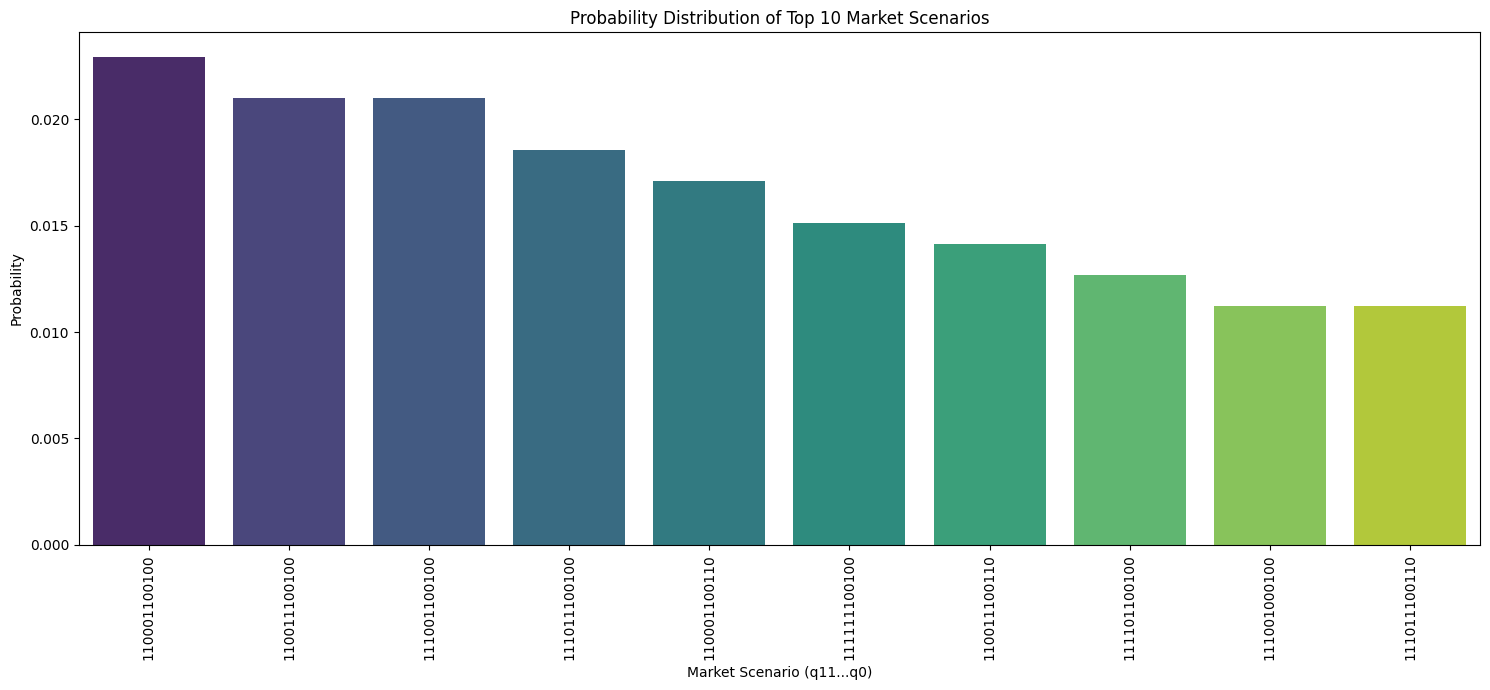

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract states and their frequencies
states = list(sorted_counts.keys())
frequencies = list(sorted_counts.values())

# Convert frequencies to probabilities
shots = sum(frequencies)
probabilities = [freq / shots for freq in frequencies]

# Create a DataFrame for easier plotting with seaborn
import pandas as pd
df_scenarios = pd.DataFrame({'Scenario': states, 'Probability': probabilities})

# Plot the distribution
plt.figure(figsize=(15, 7))
sns.barplot(x='Scenario', y='Probability', data=df_scenarios.head(10), palette='viridis') # Changed to head(10)
plt.xticks(rotation=90)
plt.xlabel("Market Scenario (q11...q0)")
plt.ylabel("Probability")
plt.title("Probability Distribution of Top 10 Market Scenarios") # Updated title
plt.tight_layout()
plt.show()

### Correlation Analysis: Initial Sentiment vs. Optimized State
Let's compare the initial 'sentiment' values (where 0.0 is Very Bearish and 1.0 is Very Bullish) with the recommended 'Bullish/Long' (1) or 'Bearish/Short' (0) positions from the quantum-optimized state.

In [9]:
print("\n--- Sentiment vs. Optimized State ---")

# most_stable_state is a string like '110001100100', where the rightmost bit is q0 (Nikkei)
# The assets list is ordered q0, q1, ..., q11.

# We need to iterate through assets and the reversed most_stable_state
reversed_optimal_state = most_stable_state[::-1] # Reverse the string to match asset order (q0...q11)

for i, asset_name in enumerate(assets):
    initial_sentiment = sentiment[f"q{i}_{asset_name}"]
    optimal_action_bit = reversed_optimal_state[i]

    action_description = "Bullish/Long" if optimal_action_bit == '1' else "Bearish/Short"

    print(f"Asset: {asset_name: <15} | Initial Sentiment: {initial_sentiment:.2f} | Optimized Action: {action_description}")

print("\nObservation: We can see how initial sentiments, combined with entanglement, influence the final recommended market exposure. A high sentiment (closer to 1.0) often corresponds to a 'Bullish/Long' position, while a low sentiment (closer to 0.0) often leads to a 'Bearish/Short' position, although the correlations can cause deviations.")


--- Sentiment vs. Optimized State ---
Asset: Nikkei          | Initial Sentiment: 0.70 | Optimized Action: Bearish/Short
Asset: ASX200          | Initial Sentiment: 0.40 | Optimized Action: Bearish/Short
Asset: USDJPY          | Initial Sentiment: 0.80 | Optimized Action: Bullish/Long
Asset: US10Y           | Initial Sentiment: 0.30 | Optimized Action: Bearish/Short
Asset: HSI             | Initial Sentiment: 0.20 | Optimized Action: Bearish/Short
Asset: Brent           | Initial Sentiment: 0.60 | Optimized Action: Bullish/Long
Asset: BTC             | Initial Sentiment: 0.90 | Optimized Action: Bullish/Long
Asset: MSCI_AP         | Initial Sentiment: 0.50 | Optimized Action: Bearish/Short
Asset: PBOC            | Initial Sentiment: 0.40 | Optimized Action: Bearish/Short
Asset: MSCI_EM         | Initial Sentiment: 0.50 | Optimized Action: Bearish/Short
Asset: Gold            | Initial Sentiment: 0.75 | Optimized Action: Bullish/Long
Asset: OilFutures      | Initial Sentiment: 0.65 | O

In [10]:
display(df_scenarios.describe())

,Probability
count,607.000000
mean,0.001647
std,0.002624
min,0.000488
25%,0.000488
50%,0.000488
75%,0.001465
max,0.024414


In [12]:
import pandas as pd

sentiment_series = pd.Series(sentiment)
display(sentiment_series.describe())

,0
count,12.000000
mean,0.558333
std,0.211953
min,0.200000
25%,0.400000
50%,0.550000
75%,0.712500
max,0.900000


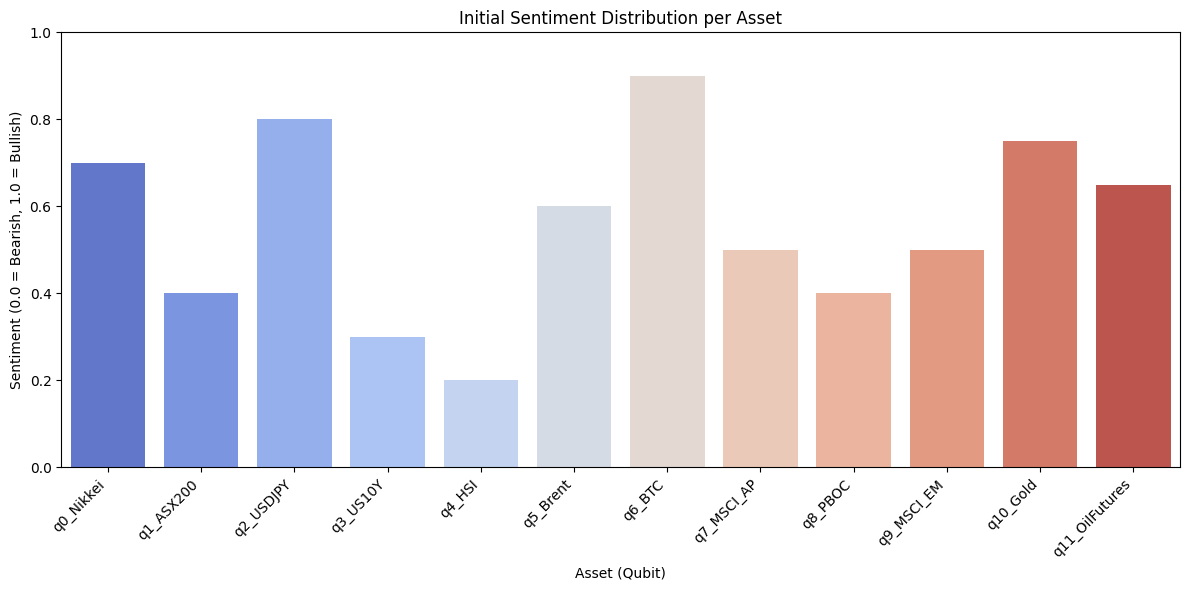

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=sentiment_series.index, y=sentiment_series.values, palette='coolwarm', hue=sentiment_series.index, legend=False)
plt.xlabel("Asset (Qubit)")
plt.ylabel("Sentiment (0.0 = Bearish, 1.0 = Bullish)")
plt.title("Initial Sentiment Distribution per Asset")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # Sentiment is between 0 and 1
plt.tight_layout()
plt.show()

In [14]:
display(df_scenarios.head(5))

,Scenario,Probability
0,111011100100,0.024414
1,110011100100,0.022949
2,110001100100,0.020508
3,111001100100,0.018555
4,110001000100,0.018066


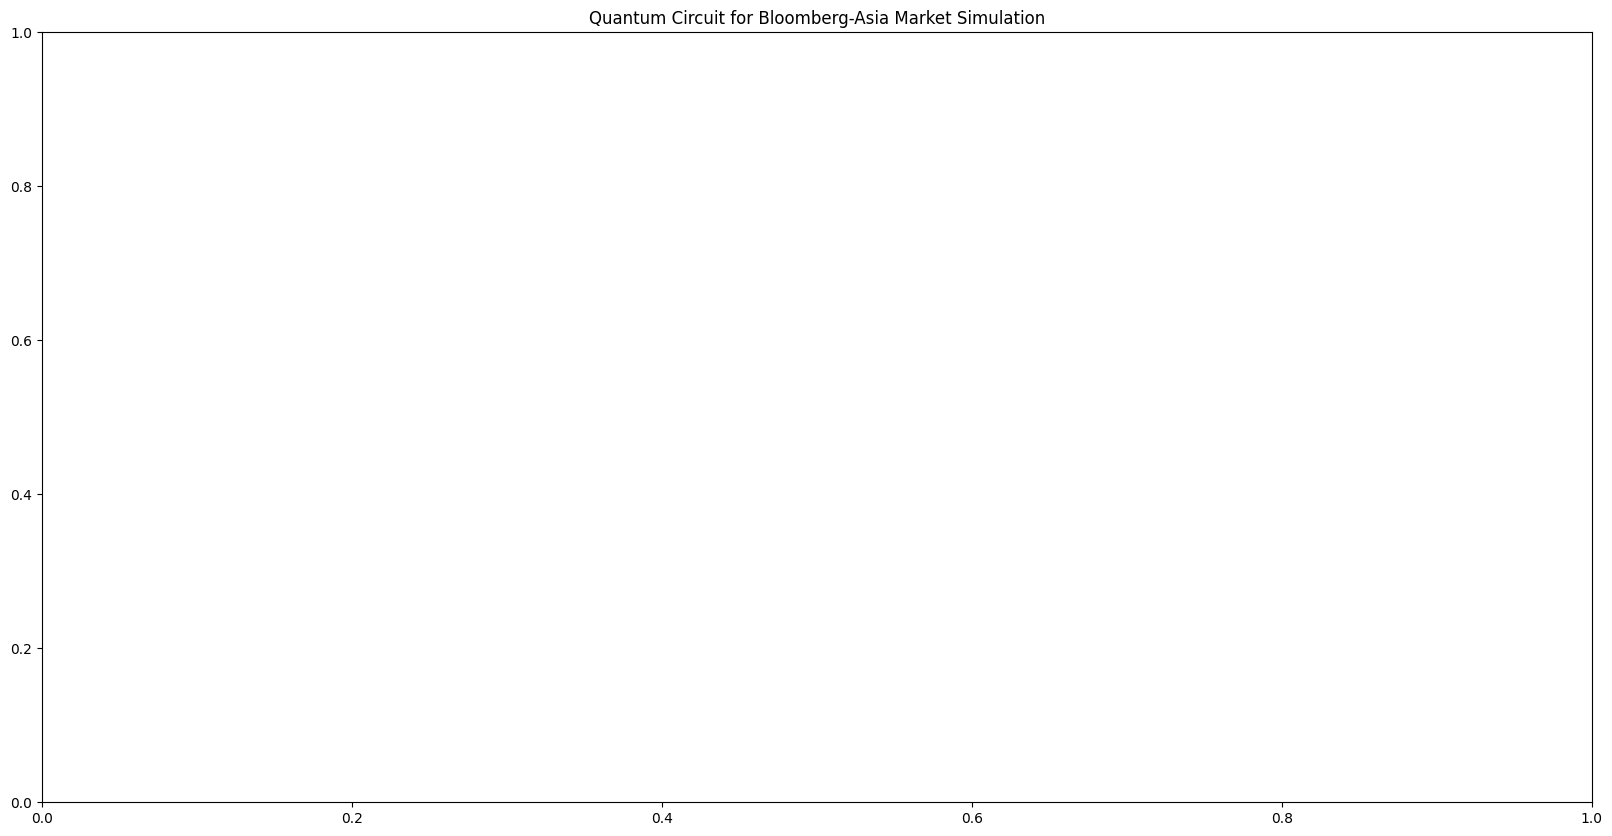

In [17]:
import matplotlib.pyplot as plt

# Draw the circuit using matplotlib backend
circuit_diagram = qc.draw(output='mpl', style={'filename': 'circuit.png'})

# Display the plot
plt.figure(figsize=(20, 10)) # Adjust figure size for better readability of a larger circuit
circuit_diagram.show()
plt.title("Quantum Circuit for Bloomberg-Asia Market Simulation")
plt.show()

In [6]:
# --- STEP 3: PORTFOLIO OPTIMIZATION (THE "GROUND STATE") ---

# Let's assume we want to minimize risk (Energy)
# In this simplified model, we interpret the 'counts' as our
# cost landscape where higher probability = more stable state.

most_stable_state = max(counts, key=counts.get)
print(f"--- QUANTUM OPTIMIZED PORTFOLIO SIGNAL ---")
print(f"Optimal Market Exposure: {most_stable_state}")

# Interpret the bitstring back to your Bloomberg Qubits
assets = ["Nikkei", "ASX200", "USDJPY", "US10Y", "HSI", "Brent", "BTC", "MSCI_AP", "PBOC", "MSCI_EM", "Gold", "OilFutures"]
for i, bit in enumerate(reversed(most_stable_state)):
    status = "Bullish/Long" if bit == '1' else "Bearish/Short"
    print(f"{assets[i]}: {status}")

--- QUANTUM OPTIMIZED PORTFOLIO SIGNAL ---
Optimal Market Exposure: 110001100100
Nikkei: Bearish/Short
ASX200: Bearish/Short
USDJPY: Bullish/Long
US10Y: Bearish/Short
HSI: Bearish/Short
Brent: Bullish/Long
BTC: Bullish/Long
MSCI_AP: Bearish/Short
PBOC: Bearish/Short
MSCI_EM: Bearish/Short
Gold: Bullish/Long
OilFutures: Bullish/Long
